In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
#import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import matplotlib.patches as patches
import os
import cartopy.mpl.ticker as cticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import re
import datetime
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
import datetime
from matplotlib.colors import ListedColormap
from matplotlib.colors import TwoSlopeNorm

In [4]:
clim_t850 = xr.open_dataset('/home/kit/imk-tro/gj5173/tmp/clim_T85000_30day_centered_on_0629_1979-2020_-180.0--60.0degE_25.0-80.0degN_by_grid_point',engine = 'netcdf4')




In [6]:
clim_t850

<xarray.Dataset>
Dimensions:  (lon: 240, lat: 110)
Coordinates:
  * lon      (lon) float32 -180.0 -179.5 -179.0 -178.5 ... -61.5 -61.0 -60.5
  * lat      (lat) float32 25.0 25.5 26.0 26.5 27.0 ... 77.5 78.0 78.5 79.0 79.5
    plev     float64 ...
Data variables:
    T        (lat, lon) float32 ...

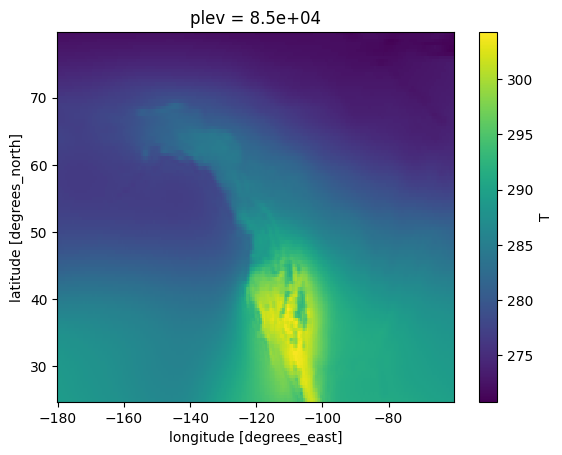

In [11]:
clim_t850.T.plot()

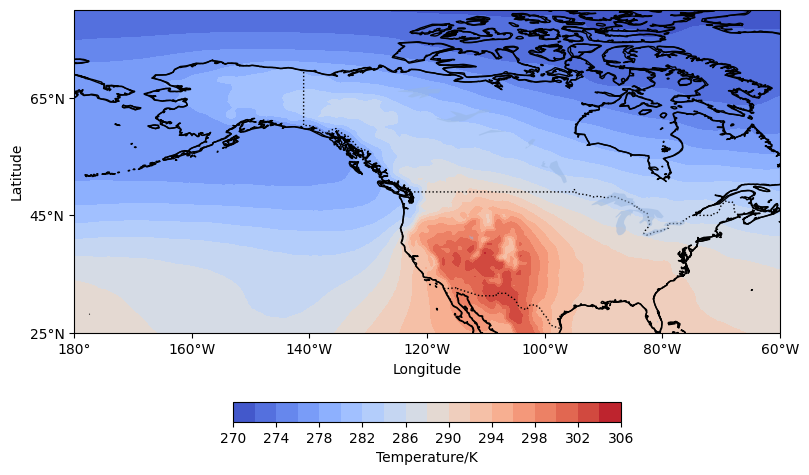

In [10]:
#climatology plots

#lat = ds_clim_79_20['latitude']
#lon = ds_clim_79_20['longitude']

#lat= ds_era['phony_dim_2']
#lon= ds_era['phony_dim_3']
#phony_dim_2(260,40,-1)
#pholat= ds_era['phony_dim_2'][260:40:-1]ny_dim_3= slice(720,1200)

#ds_era.fields

#ds_era_tr = ds_era.transpose('phony_dim_0','phony_dim_1','phony_dim_3','phony_dim_2')

#lat= ds_era['phony_dim_2']
#lon= ds_era['phony_dim_3'][720:1200]

lat = np.linspace(25, 80, 110)
lon = np.linspace(-180, -60, 240)
lon_grid, lat_grid = np.meshgrid(lon, lat)


#ds_era_t2m = ds_era.fields[660,2,260:40:-1,720:1200]


# Set the CARTOPY_USER_BACKGROUNDS environment variable
#os.environ['CARTOPY_USER_BACKGROUNDS'] = '/home/kit/imk-tro/gj5173/'

# Assuming you have latitude ('lat'), longitude ('lon'), and temperature ('temperature') variables

# Create a figure and axis with Cartopy projection
fig = plt.figure(figsize=(10,6))
#proj = ccrs.PlateCarree(central_longitude=-120)
#ax = fig.add_axes([0.1, 0.8, 0.5, 0.3],projection = proj)
ax = plt.axes(projection=ccrs.PlateCarree())
#proj = ccrs.PlateCarree(central_longitude=-120) 


# Set up the map projection
#projection = 'merc'  # Choose the desired projection
#fig, ax = plt.subplots(subplot_kw={'projection':ccrs.PlateCarree() })

# Convert coordinates to map projection
x, y = lon_grid, lat_grid  # Replace with the appropriate transformation method






leftlon, rightlon, lowerlat, upperlat = (-180,-60,25,80)#define map extent

#f2_ax1 = fig.add_axes([0.1, 0.8, 0.5, 0.3],projection = proj)
ax.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
                  


# Add map 
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='w')


ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.set_xticks(np.arange(leftlon,rightlon+10,20), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(lowerlat,upperlat,20), crs=ccrs.PlateCarree())

lat_formatter = cticker.LatitudeFormatter()
lon_formatter = cticker.LongitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

# Plot the contour map
#contour = ax.contourf(lon,lat,ds_era.fields[656,2,260:40:-1,720:1200],cmap='jet',levels=20)
contour1 = ax.contourf(x,y,clim_t850.T,cmap='coolwarm',levels=20)
#mark the location of lytton
#red_point_lon = -121.50
#red_point_lat = 50.25
#ax.plot(red_point_lon, red_point_lat, 'r*', markersize=10)
# Add colorbar
#plt.colorbar()
cbar = plt.colorbar(contour1, ax=ax, label='Temperature/K',orientation='horizontal',shrink=0.5)


# Set plot title and labels
#plt.title('T2m_2021-06-15-00:00UTC_ERA5')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

#plt.savefig('/home/kit/imk-tro/gj5173/plots07.27/climatology.png', bbox_inches='tight',dpi=100)

#656:2021.06.14 00UTC -06.29 00UTC

# Show the plot
plt.show()

In [14]:
ds_era = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/era5/2021.h5')
ds_era
ds_era_t850 = ds_era.fields[716,5,260:40:-1,720:1200]

In [15]:
#interpolate from (220,480) to (110,240) 
original_data = ds_era_t850

# Define the original grid points along the last two dimensions
x_orig = np.arange(220)
y_orig = np.arange(480)

# Define the new grid points along the last two dimensions
y_new = np.linspace(0, 480 - 1, 240)  
x_new = np.linspace(0, 220 - 1, 110)


ds_era_t850_interpolated = original_data.interp(coords={'phony_dim_2': x_new, 'phony_dim_3': y_new}, method='linear')


In [16]:
ds_era_t850_interpolated

<xarray.DataArray 'fields' (phony_dim_2: 110, phony_dim_3: 240)>
array([[290.91253662, 290.51593707, 290.16667514, ..., 288.06607656,
        287.97008345, 287.84085083],
       [291.12272686, 290.73480481, 290.30151034, ..., 288.01843268,
        287.90436832, 287.77077379],
       [291.0338104 , 290.64639785, 290.30384686, ..., 288.00045765,
        287.87551401, 287.77155605],
       ...,
       [265.15824624, 265.14064407, 265.12302741, ..., 271.52470106,
        271.7282624 , 271.94117443],
       [265.16727553, 265.16063599, 265.15399617, ..., 269.6740813 ,
        269.55673022, 269.80982313],
       [265.16500854, 265.14744574, 265.12333405, ..., 271.46478182,
        271.1734065 , 270.9826355 ]])
Coordinates:
  * phony_dim_2  (phony_dim_2) float64 0.0 2.009 4.018 ... 215.0 217.0 219.0
  * phony_dim_3  (phony_dim_3) float64 0.0 2.004 4.008 ... 475.0 477.0 479.0

In [18]:
#use smaller batches to calculate the difference(cuz direct calculation is not possible)
variable1 = ds_era_t850_interpolated.values
variable2 = clim_t850.T[:,:].values


batch_size = 50  # Set the desired batch size

# Process data in smaller batches using a loop

anomaly_era5_t850 = np.empty((110, 240))
for i in range(0, 110, batch_size):
    for j in range(0, 240, batch_size):
        batch_variable1 = variable1[i:i + batch_size, j:j + batch_size]
        batch_variable2 = variable2[i:i + batch_size, j:j + batch_size]
        
        # Calculate the difference point by point for the current batch
        batch_difference = batch_variable1 - batch_variable2
        
        # Update the difference array with the current batch_difference
        anomaly_era5_t850[i:i + batch_size, j:j + batch_size] = batch_difference

In [30]:
%store anomaly_era5_t850

Stored 'anomaly_era5_t850' (ndarray)


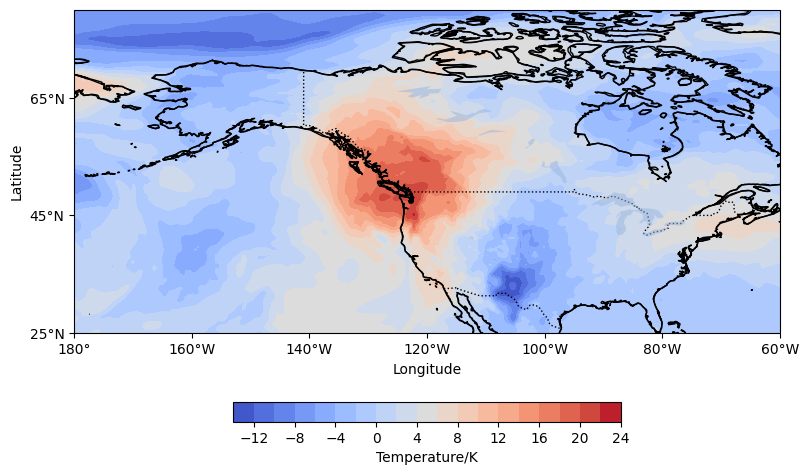

In [20]:
#climatology plots

#lat = ds_clim_79_20['latitude']
#lon = ds_clim_79_20['longitude']

#lat= ds_era['phony_dim_2']
#lon= ds_era['phony_dim_3']
#phony_dim_2(260,40,-1)
#pholat= ds_era['phony_dim_2'][260:40:-1]ny_dim_3= slice(720,1200)

#ds_era.fields

#ds_era_tr = ds_era.transpose('phony_dim_0','phony_dim_1','phony_dim_3','phony_dim_2')

#lat= ds_era['phony_dim_2']
#lon= ds_era['phony_dim_3'][720:1200]

lat = np.linspace(25, 80, 110)
lon = np.linspace(-180, -60, 240)
lon_grid, lat_grid = np.meshgrid(lon, lat)


#ds_era_t2m = ds_era.fields[660,2,260:40:-1,720:1200]


# Set the CARTOPY_USER_BACKGROUNDS environment variable
#os.environ['CARTOPY_USER_BACKGROUNDS'] = '/home/kit/imk-tro/gj5173/'

# Assuming you have latitude ('lat'), longitude ('lon'), and temperature ('temperature') variables

# Create a figure and axis with Cartopy projection
fig = plt.figure(figsize=(10,6))
#proj = ccrs.PlateCarree(central_longitude=-120)
#ax = fig.add_axes([0.1, 0.8, 0.5, 0.3],projection = proj)
ax = plt.axes(projection=ccrs.PlateCarree())
#proj = ccrs.PlateCarree(central_longitude=-120) 


# Set up the map projection
#projection = 'merc'  # Choose the desired projection
#fig, ax = plt.subplots(subplot_kw={'projection':ccrs.PlateCarree() })

# Convert coordinates to map projection
x, y = lon_grid, lat_grid  # Replace with the appropriate transformation method






leftlon, rightlon, lowerlat, upperlat = (-180,-60,25,80)#define map extent

#f2_ax1 = fig.add_axes([0.1, 0.8, 0.5, 0.3],projection = proj)
ax.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
                  


# Add map 
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='w')


ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.set_xticks(np.arange(leftlon,rightlon+10,20), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(lowerlat,upperlat,20), crs=ccrs.PlateCarree())

lat_formatter = cticker.LatitudeFormatter()
lon_formatter = cticker.LongitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

# Plot the contour map
#contour = ax.contourf(lon,lat,ds_era.fields[656,2,260:40:-1,720:1200],cmap='jet',levels=20)
contour1 = ax.contourf(x,y,anomaly_era5_t850,cmap='coolwarm',levels=20)
#mark the location of lytton
#red_point_lon = -121.50
#red_point_lat = 50.25
#ax.plot(red_point_lon, red_point_lat, 'r*', markersize=10)
# Add colorbar
#plt.colorbar()
cbar = plt.colorbar(contour1, ax=ax, label='Temperature/K',orientation='horizontal',shrink=0.5)


# Set plot title and labels
#plt.title('T2m_2021-06-15-00:00UTC_ERA5')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

#plt.savefig('/home/kit/imk-tro/gj5173/plots07.27/climatology.png', bbox_inches='tight',dpi=100)

#656:2021.06.14 00UTC -06.29 00UTC

# Show the plot
plt.show()

In [23]:
ds_ec_1 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_cf_20210615_00_pl.nc')

variable_data_ec_1 = ds_ec_1['t'][56,1,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))


ds_ec_2 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_cf_20210616_00_pl.nc') 
variable_data_ec_2 = ds_ec_2['t'][52,1,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_3 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_cf_20210617_00_pl.nc') 
variable_data_ec_3 = ds_ec_3['t'][48,1,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_4 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_cf_20210618_00_pl.nc') 
variable_data_ec_4 = ds_ec_4['t'][44,1,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_5 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_cf_20210619_00_pl.nc') 
variable_data_ec_5 = ds_ec_5['t'][40,1,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_6 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_cf_20210620_00_pl.nc') 
variable_data_ec_6 = ds_ec_6['t'][36,1,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_7 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_cf_20210621_00_pl.nc') 
variable_data_ec_7 = ds_ec_7['t'][32,1,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_8 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_cf_20210622_00_pl.nc') 
variable_data_ec_8 = ds_ec_8['t'][28,1,:,:]

ds_ec_9 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_cf_20210623_00_pl.nc') 
variable_data_ec_9 = ds_ec_9['t'][24,1,:,:]

ds_ec_10 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_cf_20210624_00_pl.nc') 
variable_data_ec_10 = ds_ec_10['t'][20,1,:,:]

ds_ec_11 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_cf_20210625_00_pl.nc') 
variable_data_ec_11 = ds_ec_11['t'][16,1,:,:]

ds_ec_12 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_cf_20210626_00_pl.nc') 
variable_data_ec_12 = ds_ec_12['t'][12,1,:,:]

ds_ec_13 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_cf_20210627_00_pl.nc') 
variable_data_ec_13 = ds_ec_13['t'][8,1,:,:]

ds_ec_14 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_cf_20210628_00_pl.nc') 
variable_data_ec_14 = ds_ec_14['t'][4,1,:,:]

ds_ec_15 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_cf_20210629_00_pl.nc') 
variable_data_ec_15 = ds_ec_15['t'][0,1,:,:]

In [24]:
new_dimension = 'time'
ds_ec_1_expanded = variable_data_ec_1.expand_dims(**{new_dimension: [0]})
ds_ec_2_expanded = variable_data_ec_2.expand_dims(**{new_dimension: [1]})
ds_ec_3_expanded = variable_data_ec_3.expand_dims(**{new_dimension: [2]})
ds_ec_4_expanded = variable_data_ec_4.expand_dims(**{new_dimension: [3]})
ds_ec_5_expanded = variable_data_ec_5.expand_dims(**{new_dimension: [4]})
ds_ec_6_expanded = variable_data_ec_6.expand_dims(**{new_dimension: [5]})
ds_ec_7_expanded = variable_data_ec_7.expand_dims(**{new_dimension: [6]})
ds_ec_8_expanded = variable_data_ec_8.expand_dims(**{new_dimension: [7]})
ds_ec_9_expanded = variable_data_ec_9.expand_dims(**{new_dimension: [8]})
ds_ec_10_expanded = variable_data_ec_10.expand_dims(**{new_dimension:[9]})
ds_ec_11_expanded = variable_data_ec_11.expand_dims(**{new_dimension: [10]})
ds_ec_12_expanded = variable_data_ec_12.expand_dims(**{new_dimension: [11]})
ds_ec_13_expanded = variable_data_ec_13.expand_dims(**{new_dimension: [12]})
ds_ec_14_expanded = variable_data_ec_14.expand_dims(**{new_dimension: [13]})
ds_ec_15_expanded = variable_data_ec_15.expand_dims(**{new_dimension: [14]})

In [25]:
ds_ec_t850_cf = xr.concat([ds_ec_1_expanded,ds_ec_2_expanded,ds_ec_3_expanded,ds_ec_4_expanded,ds_ec_5_expanded,ds_ec_6_expanded,ds_ec_7_expanded,ds_ec_8_expanded,ds_ec_9_expanded,ds_ec_10_expanded,ds_ec_11_expanded,ds_ec_12_expanded,ds_ec_13_expanded,ds_ec_14_expanded,ds_ec_15_expanded],dim=new_dimension)

/home/kit/imk-tro/gj5173/anaconda3/envs/newenvi1/lib/python3.9/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


In [31]:
%store ds_ec_t850_cf

Stored 'ds_ec_t850_cf' (DataArray)


In [27]:
ds_ec_1 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210615_00_pl.nc') 
ds_ec_1 
variable_data_ec_1 = ds_ec_1['t'][56,:,1,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_2 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210616_00_pl.nc') 
variable_data_ec_2 = ds_ec_2['t'][52,:,1,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_3 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210617_00_pl.nc') 
variable_data_ec_3 = ds_ec_3['t'][48,:,1,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_4 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210618_00_pl.nc') 
variable_data_ec_4 = ds_ec_4['t'][44,:,1,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_5 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210619_00_pl.nc') 
variable_data_ec_5 = ds_ec_5['t'][40,:,1,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_6 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210620_00_pl.nc') 
variable_data_ec_6 = ds_ec_6['t'][36,:,1,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_7 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210621_00_pl.nc') 
variable_data_ec_7 = ds_ec_7['t'][32,:,1,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_8 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210622_00_pl.nc') 
variable_data_ec_8 = ds_ec_8['t'][28,:,1,:,:]

ds_ec_9 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210623_00_pl.nc') 
variable_data_ec_9 = ds_ec_9['t'][24,:,1,:,:]

ds_ec_10 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210624_00_pl.nc') 
variable_data_ec_10 = ds_ec_10['t'][20,:,1,:,:]

ds_ec_11 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210625_00_pl.nc') 
variable_data_ec_11 = ds_ec_11['t'][16,:,1,:,:]

ds_ec_12 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210626_00_pl.nc') 
variable_data_ec_12 = ds_ec_12['t'][12,:,1,:,:]

ds_ec_13 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210627_00_pl.nc') 
variable_data_ec_13 = ds_ec_13['t'][8,:,1,:,:]

ds_ec_14 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210628_00_pl.nc') 
variable_data_ec_14 = ds_ec_14['t'][4,:,1,:,:]

ds_ec_15 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210629_00_pl.nc') 
variable_data_ec_15 = ds_ec_15['t'][0,:,1,:,:]

In [28]:
new_dimension = 'time'
ds_ec_1_expanded = variable_data_ec_1.expand_dims(**{new_dimension: [0]})
ds_ec_2_expanded = variable_data_ec_2.expand_dims(**{new_dimension: [1]})
ds_ec_3_expanded = variable_data_ec_3.expand_dims(**{new_dimension: [2]})
ds_ec_4_expanded = variable_data_ec_4.expand_dims(**{new_dimension: [3]})
ds_ec_5_expanded = variable_data_ec_5.expand_dims(**{new_dimension: [4]})
ds_ec_6_expanded = variable_data_ec_6.expand_dims(**{new_dimension: [5]})
ds_ec_7_expanded = variable_data_ec_7.expand_dims(**{new_dimension: [6]})
ds_ec_8_expanded = variable_data_ec_8.expand_dims(**{new_dimension: [7]})
ds_ec_9_expanded = variable_data_ec_9.expand_dims(**{new_dimension: [8]})
ds_ec_10_expanded = variable_data_ec_10.expand_dims(**{new_dimension:[9]})
ds_ec_11_expanded = variable_data_ec_11.expand_dims(**{new_dimension: [10]})
ds_ec_12_expanded = variable_data_ec_12.expand_dims(**{new_dimension: [11]})
ds_ec_13_expanded = variable_data_ec_13.expand_dims(**{new_dimension: [12]})
ds_ec_14_expanded = variable_data_ec_14.expand_dims(**{new_dimension: [13]})
ds_ec_15_expanded = variable_data_ec_15.expand_dims(**{new_dimension: [13]})

In [29]:
ds_ec_t850_pf = xr.concat([ds_ec_1_expanded,ds_ec_2_expanded,ds_ec_3_expanded,ds_ec_4_expanded,ds_ec_5_expanded,ds_ec_6_expanded,ds_ec_7_expanded,ds_ec_8_expanded,ds_ec_9_expanded,ds_ec_10_expanded,ds_ec_11_expanded,ds_ec_12_expanded,ds_ec_13_expanded,ds_ec_14_expanded,ds_ec_15_expanded],dim=new_dimension)

/home/kit/imk-tro/gj5173/anaconda3/envs/newenvi1/lib/python3.9/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


In [34]:
%store ds_ec_t850_pf

Stored 'ds_ec_t850_pf' (DataArray)


In [38]:
#interpolate from (220,480) to (110,240) 
original_data_pf = ds_ec_t850_pf[:,:,:,:] 
original_data_cf = ds_ec_t850_cf[:,:,:] 

In [39]:
ds_ec_t850_pf_interpolated = np.zeros((15, 50,110,240),dtype=float)
ds_ec_t850_cf_interpolated = np.zeros((15,110,240),dtype=float)

In [40]:
for i in range(15):
    for j in range(50):
# Define the original grid points along the last two dimensions
        x_orig = np.linspace(25,80,221)
        y_orig = np.linspace(-180,-60,481)

# Define the new grid points along the last two dimensions
        y_new = np.linspace(-180, -60, 240)  
        x_new = np.linspace(25, 80, 110)

        ds_ec_t850_pf_interpolated[i,j,:,:] = original_data_pf[i,j,:,:].interp(coords={'longitude': y_new, 'latitude': x_new}, method='cubic')

In [41]:
for i in range(15):
# Define the original grid points along the last two dimensions
        x_orig = np.linspace(25,80,221)
        y_orig = np.linspace(-180,-60,481)

# Define the new grid points along the last two dimensions
        y_new = np.linspace(-180, -60, 240)  
        x_new = np.linspace(25, 80, 110)

        ds_ec_t850_cf_interpolated[i,:,:] = original_data_cf[i,:,:].interp(coords={'longitude': y_new, 'latitude': x_new}, method='cubic')

In [45]:
ds_ec_t850_cf_interpolated  = xr.DataArray(ds_ec_t850_cf_interpolated)
ds_ec_t850_pf_interpolated = xr.DataArray(ds_ec_t850_pf_interpolated)

In [46]:
#use smaller batches to calculate the difference(cuz direct calculation is not possible)
variable1 = ds_ec_t850_cf_interpolated.values
variable2 = clim_t850.T[:,:].values


batch_size = 50  # Set the desired batch size

# Process data in smaller batches using a loop

anomaly_ec_t850_cf = np.empty((15,110,240))

for i in range(0, 110, batch_size):
    for j in range(0, 240, batch_size):
        for k in range(15):
                batch_variable1 = variable1[k,i:i + batch_size, j:j + batch_size]
                batch_variable2 = variable2[i:i + batch_size, j:j + batch_size]
        
        # Calculate the difference point by point for the current batch
                batch_difference = batch_variable1 - batch_variable2
        
        # Update the difference array with the current batch_difference
                anomaly_ec_t850_cf[k,i:i + batch_size, j:j + batch_size] = batch_difference

In [49]:
%store anomaly_ec_t850_cf

Stored 'anomaly_ec_t850_cf' (ndarray)


In [50]:
#use smaller batches to calculate the difference(cuz direct calculation is not possible)
variable1 = ds_ec_t850_pf_interpolated.values
variable2 = clim_t850.T[:,:].values


batch_size = 50  # Set the desired batch size

# Process data in smaller batches using a loop

anomaly_ec_t850_pf = np.empty((15,50,110,240))

for i in range(0, 110, batch_size):
    for j in range(0, 240, batch_size):
        for k in range(15):
            for l in range(50):
                batch_variable1 = variable1[k,l,i:i + batch_size, j:j + batch_size]
                batch_variable2 = variable2[i:i + batch_size, j:j + batch_size]
        
        # Calculate the difference point by point for the current batch
                batch_difference = batch_variable1 - batch_variable2
        
        # Update the difference array with the current batch_difference
                anomaly_ec_t850_pf[k,l,i:i + batch_size, j:j + batch_size] = batch_difference

In [52]:
%store -r anomaly_ec_t850_pf
%store -r anomaly_era5_t850
%store -r anomaly_ec_t850_cf

In [53]:
from scipy.stats import pearsonr
acc_ec_box_t850_pf = np.empty((15,50))
for i in range(15):
    for j in range(50):
        acc_ec_box_t850_pf[i,j] = np.corrcoef(anomaly_era5_t850[31:71,97:137].flatten(), anomaly_ec_t850_pf[i,j,31:71,97:137].flatten())[0,1]

In [54]:
#acc_ec_cf
from scipy.stats import pearsonr
acc_ec_box_t850_cf = np.empty(15)
for i in range(15):
        acc_ec_box_t850_cf[i] = np.corrcoef(anomaly_era5_t850[31:71,97:137].flatten(), anomaly_ec_t850_cf[i,31:71,97:137].flatten())[0,1]

In [55]:
#lager box
from scipy.stats import pearsonr
acc_ec_box_big_t850_pf = np.empty((15,50))
for i in range(15):
    for j in range(50):
        acc_ec_box_big_t850_pf[i,j] = np.corrcoef(anomaly_era5_t850[10:100,70:170].flatten(), anomaly_ec_t850_pf[i,j,10:100,70:170].flatten())[0,1]

In [57]:
#lager box acc_ec_cf
from scipy.stats import pearsonr
acc_ec_box_big_t850_cf = np.empty(15)
for i in range(15):
        acc_ec_box_big_t850_cf[i] = np.corrcoef(anomaly_era5_t850[10:100,70:170].flatten(), anomaly_ec_t850_cf[i,10:100,70:170].flatten())[0,1]

In [60]:
#whole picture
from scipy.stats import pearsonr
acc_ec_box_whole_t850_pf = np.empty((15,50))
for i in range(15):
    for j in range(50):
        acc_ec_box_whole_t850_pf[i,j] = np.corrcoef(anomaly_era5_t850[:,:].flatten(), anomaly_ec_t850_pf[i,j,:,:].flatten())[0,1]

In [61]:
#whole picture acc_ec_cf
from scipy.stats import pearsonr
acc_ec_box_whole_t850_cf = np.empty(15)
for i in range(15):
        acc_ec_box_whole_t850_cf[i] = np.corrcoef(anomaly_era5_t850[:,:].flatten(), anomaly_ec_t850_cf[i,:,:].flatten())[0,1]

In [62]:
%store acc_ec_box_t850_pf
%store  acc_ec_box_t850_cf
%store  acc_ec_box_big_t850_pf
%store  acc_ec_box_big_t850_cf
%store  acc_ec_box_whole_t850_pf
%store  acc_ec_box_whole_t850_cf

Stored 'acc_ec_box_t850_pf' (ndarray)
Stored 'acc_ec_box_t850_cf' (ndarray)
Stored 'acc_ec_box_big_t850_pf' (ndarray)
Stored 'acc_ec_box_big_t850_cf' (ndarray)
Stored 'acc_ec_box_whole_t850_pf' (ndarray)
Stored 'acc_ec_box_whole_t850_cf' (ndarray)


([<matplotlib.axis.XTick at 0x14b2d4f0f850>,
 [Text(1, 0, 'Jun 15'),
  Text(2, 0, 'Jun 16'),
  Text(3, 0, 'Jun 17'),
  Text(4, 0, 'Jun 18'),
  Text(5, 0, 'Jun 19'),
  Text(6, 0, 'Jun 20'),
  Text(7, 0, 'Jun 21'),
  Text(8, 0, 'Jun 22'),
  Text(9, 0, 'Jun 23'),
  Text(10, 0, 'Jun 24'),
  Text(11, 0, 'Jun 25'),
  Text(12, 0, 'Jun 26'),
  Text(13, 0, 'Jun 27'),
  Text(14, 0, 'Jun 28'),
  Text(15, 0, 'Jun 29')])

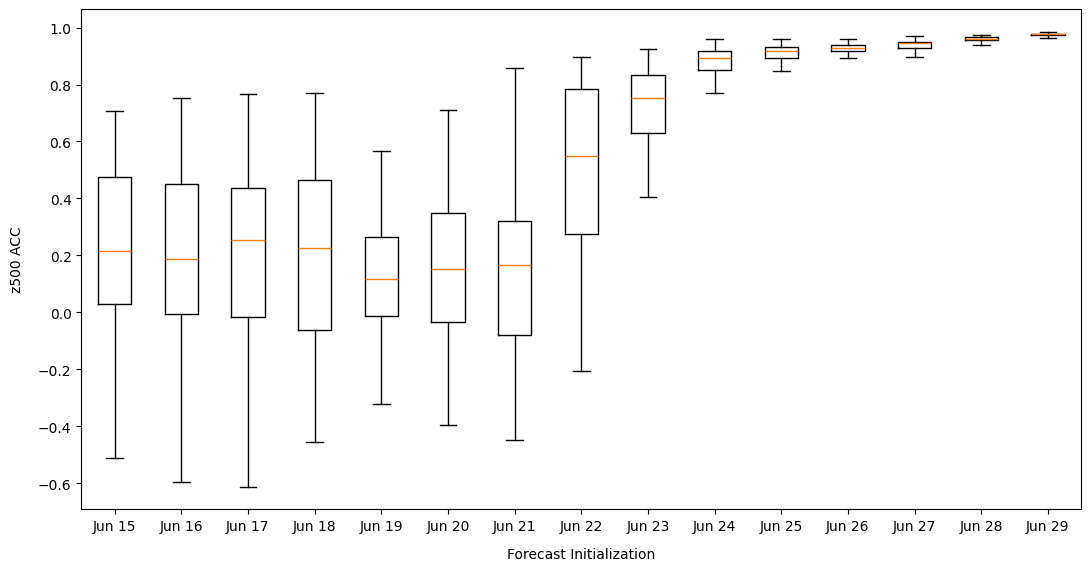

In [63]:
#ACC boxplot
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel("Forecast Initialization", labelpad=10)
ax.set_ylabel("z500 ACC", labelpad=10)
#ax.plot(df, 'o', color='black',label='ECMWF')
data=acc_ec_box_t850_pf.T
ax.boxplot(data,showfliers = False)
#ax.axhline(y=mean_era5_06_29, color='r', linestyle='-',label = 'ERA5')
#plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,15],
           ["Jun 15", "Jun 16", "Jun 17", "Jun 18", "Jun 19", "Jun 20", "Jun 21","Jun 22", "Jun 23", "Jun 24", "Jun 25", "Jun 26", "Jun 27", 
               "Jun 28", "Jun 29"])

([<matplotlib.axis.XTick at 0x14b2d4eee6d0>,
 [Text(1, 0, 'Jun 15'),
  Text(2, 0, 'Jun 16'),
  Text(3, 0, 'Jun 17'),
  Text(4, 0, 'Jun 18'),
  Text(5, 0, 'Jun 19'),
  Text(6, 0, 'Jun 20'),
  Text(7, 0, 'Jun 21'),
  Text(8, 0, 'Jun 22'),
  Text(9, 0, 'Jun 23'),
  Text(10, 0, 'Jun 24'),
  Text(11, 0, 'Jun 25'),
  Text(12, 0, 'Jun 26'),
  Text(13, 0, 'Jun 27'),
  Text(14, 0, 'Jun 28'),
  Text(15, 0, 'Jun 29')])

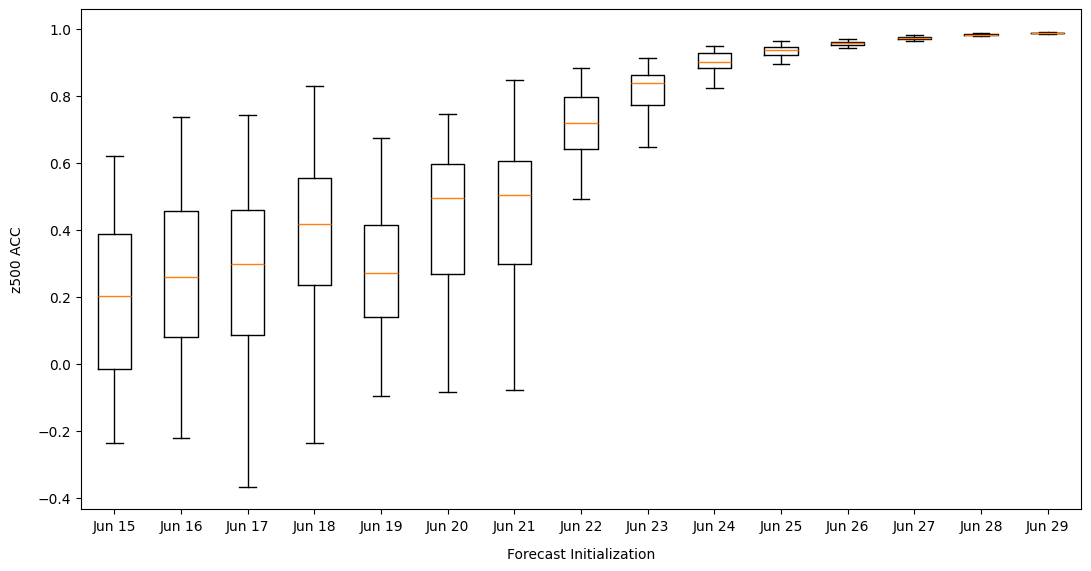

In [64]:
#ACC boxplot-bigger box
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel("Forecast Initialization", labelpad=10)
ax.set_ylabel("z500 ACC", labelpad=10)
#ax.plot(df, 'o', color='black',label='ECMWF')
data=acc_ec_box_big_t850_pf.T
ax.boxplot(data,showfliers = False)
#ax.axhline(y=mean_era5_06_29, color='r', linestyle='-',label = 'ERA5')
#plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,15],
           ["Jun 15", "Jun 16", "Jun 17", "Jun 18", "Jun 19", "Jun 20", "Jun 21","Jun 22", "Jun 23", "Jun 24", "Jun 25", "Jun 26", "Jun 27", 
               "Jun 28", "Jun 29"])

([<matplotlib.axis.XTick at 0x14b2d51848b0>,
 [Text(1, 0, 'Jun 15'),
  Text(2, 0, 'Jun 16'),
  Text(3, 0, 'Jun 17'),
  Text(4, 0, 'Jun 18'),
  Text(5, 0, 'Jun 19'),
  Text(6, 0, 'Jun 20'),
  Text(7, 0, 'Jun 21'),
  Text(8, 0, 'Jun 22'),
  Text(9, 0, 'Jun 23'),
  Text(10, 0, 'Jun 24'),
  Text(11, 0, 'Jun 25'),
  Text(12, 0, 'Jun 26'),
  Text(13, 0, 'Jun 27'),
  Text(14, 0, 'Jun 28'),
  Text(15, 0, 'Jun 29')])

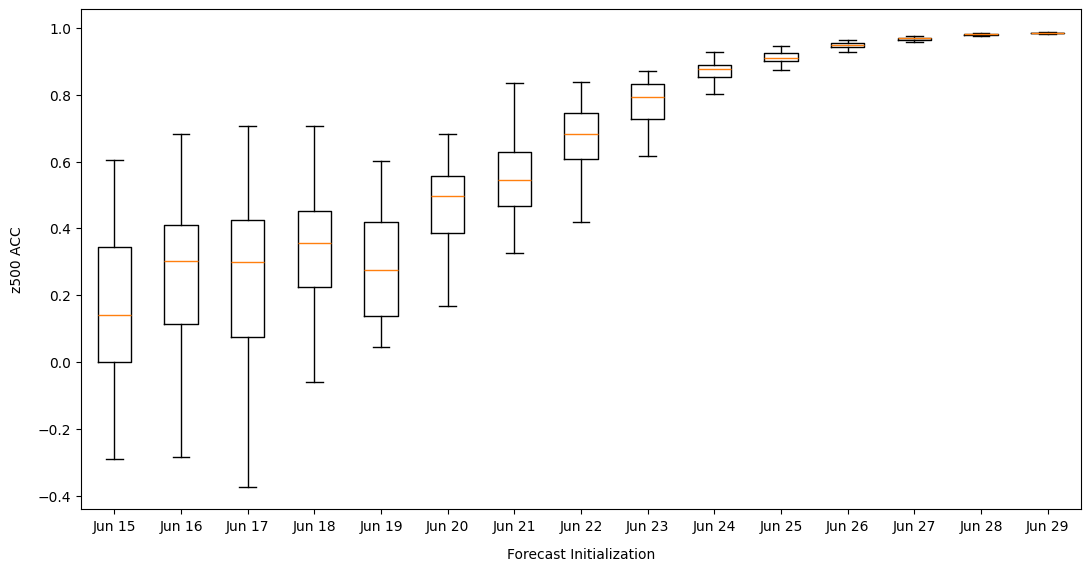

In [66]:
#ACC boxplot-whole box
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel("Forecast Initialization", labelpad=10)
ax.set_ylabel("z500 ACC", labelpad=10)
#ax.plot(df, 'o', color='black',label='ECMWF')
data=acc_ec_box_whole_t850_pf.T
ax.boxplot(data,showfliers = False)
#ax.axhline(y=mean_era5_06_29, color='r', linestyle='-',label = 'ERA5')
#plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,15],
           ["Jun 15", "Jun 16", "Jun 17", "Jun 18", "Jun 19", "Jun 20", "Jun 21","Jun 22", "Jun 23", "Jun 24", "Jun 25", "Jun 26", "Jun 27", 
               "Jun 28", "Jun 29"])

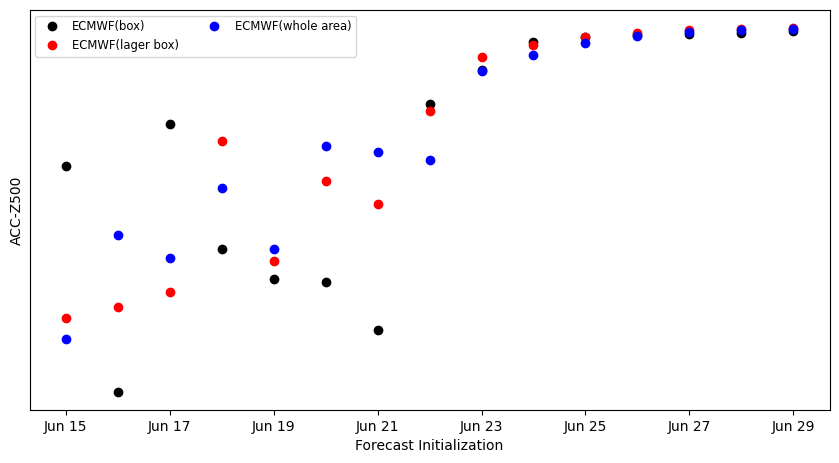

In [67]:
#creating plots
fig = plt.figure(figsize=(8,4))
ax = fig.add_axes([0,0,1,1])
index_dates = pd.date_range('2021-06-15', periods=15, freq='D')
index_dates
date_format = mdates.DateFormatter('%b %d')

x = np.linspace(0,14,15)

y_ticks = range(285, 303, 5)  # Generate tick positions with a gap of 5 units
ax.set_yticks(y_ticks)




y = acc_ec_box_t850_cf[:]
y1 = acc_ec_box_big_t850_cf[:]
y2 = acc_ec_box_whole_t850_cf[:]
df = pd.DataFrame(y, index=index_dates)
df_1 = pd.DataFrame(y1, index=index_dates)
df_2 = pd.DataFrame(y2, index=index_dates)
plt.plot(df, 'o', color='black',label='ECMWF(box)')
plt.plot(df_1, 'o', color='red',label='ECMWF(lager box)')
plt.plot(df_2, 'o', color='blue',label='ECMWF(whole area)')
plt.gca().xaxis.set_major_formatter(date_format)
#plt.axhline(y=mean_era5_06_29, color='r', linestyle='-',label = 'ERA5')
plt.xlabel('Forecast Initialization')
plt.ylabel('ACC-Z500')
plt.legend(ncol=2,fontsize='small')
#plt.savefig('/home/kit/imk-tro/gj5173/plots_another_ts/T2m_ts_another.png', bbox_inches='tight',dpi=100)
#plt.xticks(time_range)
#plt.show()